# Subreddit submission count distribution

In [79]:
import json
import gzip
import bz2
import lzma
import glob
from os.path import basename
from collections import *
from tqdm.notebook import tqdm
import ast
import networkx as nx
import random
import pickle
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

sns.set(color_codes=True)
year = '2018'

In [80]:
directory = '/shared/0/projects/reddit-political-affiliation/data/bipartite-networks/' + year + '*.tsv'
files = glob.glob(directory)

subreddit_submissions = Counter()
user_submissions = Counter()

for fname in tqdm(files, desc='Processing all files'):
        with open(fname, 'rt') as f:
            lines = f.readlines()

        for line in tqdm(lines, position=1, desc='Counting subreddit and user frequency'):
            user, subreddit, freq = line[:-1].split('\t')
            freq = int(freq)
            subreddit = 'r/' + subreddit
            subreddit_submissions[subreddit] += int(freq)
            user_submissions[user] += int(freq)

In [81]:
print(subreddit_submissions.most_common(10))
print(user_submissions.most_common(10))

[('r/AskReddit', 68695877), ('r/politics', 24074116), ('r/nba', 13915888), ('r/The_Donald', 11899507), ('r/FortNiteBR', 11011773), ('r/funny', 10831789), ('r/worldnews', 10816067), ('r/nfl', 10404955), ('r/soccer', 10084874), ('r/news', 9787184)]
[('[deleted]', 123618540), ('AutoModerator', 12617832), ('AutoNewsAdmin', 2367354), ('AutoNewspaperAdmin', 2243750), ('-en-', 1186025), ('MemeInvestor_bot', 1070703), ('transcribersofreddit', 810508), ('RPBot', 700379), ('transcribot', 524719), ('peterboykin', 522859)]


Average # of subreddit submissions: 834
Standard deviation: 68698
Lower quartile: 1
Upper quartile: 5


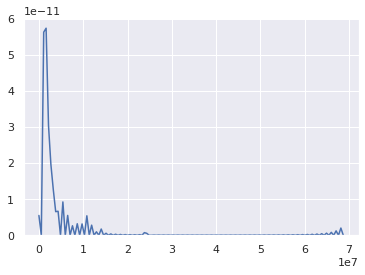

In [82]:
results = np.array(list(subreddit_submissions.values()))

print("Average # of subreddit submissions: %d" % np.mean(results))
print("Standard deviation: %d" % np.std(results))
print("Lower quartile: %d" % np.quantile(results, 0.25))
print("Upper quartile: %d" % np.quantile(results, 0.75))

sns.distplot(results, hist=False)

Submission count of 3+: 198101
Submission count of 5+: 153967
Submission count of 10+: 113285
Submission count of 25+: 50561
Submission count of 50+: 33352
Submission count of 100+: 28071
Submission count of 250+: 14185
Submission count of 500+: 10027
Submission count of 1000+: 17701
Submission count of 10000+: 6248
Submission count of 100000+: 1742
Submission count of 1000000+: 200


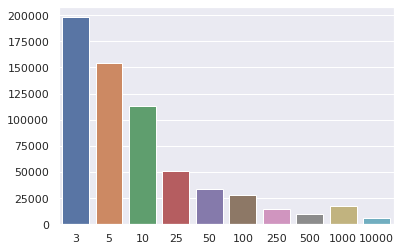

In [83]:
bins = np.array([3, 5, 10, 25, 50, 100, 250, 500, 1000, 10000, 100000, 1000000, 10000000])
df = pd.DataFrame(data=results, columns=["data"])
df["bucket"] = pd.cut(df.data, bins)

frequency, bins = np.histogram(results, bins)
for i in range(len(bins) - 1):
    print("Submission count of %d+: %d" % (bins[i], frequency[i]))
    
sns.barplot(x=bins[:10], y=frequency[:10])

# User Submission Distributions

Average # of subreddit submissions: 76
Standard deviation: 29179
Lower quartile: 2
Upper quartile: 25


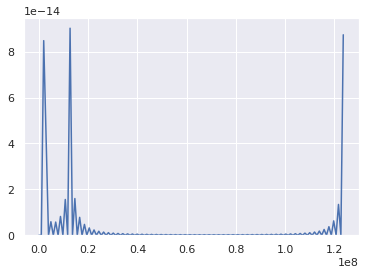

In [84]:
user_results = np.array(list(user_submissions.values()))

print("Average # of subreddit submissions: %d" % np.mean(user_results))
print("Standard deviation: %d" % np.std(user_results))
print("Lower quartile: %d" % np.quantile(user_results, 0.25))
print("Upper quartile: %d" % np.quantile(user_results, 0.75))
    
sns.distplot(user_results, hist=False)

Submission count of 5+: 2364732
Submission count of 10+: 2465347
Submission count of 25+: 1465608
Submission count of 50+: 1140641
Submission count of 100+: 1034665
Submission count of 250+: 478365
Submission count of 500+: 281450
Submission count of 1000+: 210119
Submission count of 5000+: 11190
Submission count of 10000+: 2439
Submission count of 100000+: 45


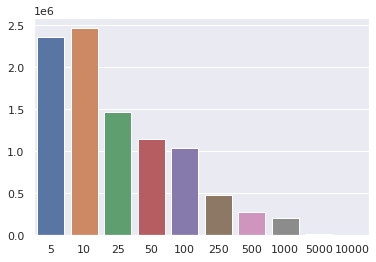

In [85]:
bins = np.array([5, 10, 25, 50, 100, 250, 500, 1000, 5000, 10000, 100000, 1000000])
df = pd.DataFrame(data=user_results, columns=["data"])
df["bucket"] = pd.cut(df.data, bins)

frequency, bins = np.histogram(user_results, bins)
for i in range(len(bins) - 1):
    print("Submission count of %d+: %d" % (bins[i], frequency[i]))
    
sns.barplot(x=bins[:10], y=frequency[:10])

### Save Data

In [86]:
# Save results to TSV
out_dir = '/shared/0/projects/reddit-political-affiliation/data/distributions/'

print("Saving subreddit distribution")
with open(out_dir + year + '_subreddits.tsv', 'w') as f:
    for element in subreddit_submissions:
        f.write('%s\t%d\n' % (element, subreddit_submissions[element]))

print("Saving user distribution ")
with open(out_dir + year + '_users.tsv', 'w') as f:
    for element in user_submissions:
        f.write('%s\t%d\n' % (element, user_submissions[element]))

Saving subreddit distribution
Saving user distribution 
